## Cross Validation of regression analysis using regularization(Lasso & Ridge)

In [1]:
import pandas as pd
df = pd.read_csv('data_banknote_authentication.txt', header=None)
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df.columns = cols

In [2]:
arr = []
for i in range(1000):
    arr.append(i/1000)
arr.sort()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

#defining features and target variable
y = df['class']
X = df.drop(columns = ['class'])

#splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [7]:
slr.fit(X_train,y_train)

LinearRegression()

In [8]:
round(slr.score(X_test,y_test),7)

0.8626147

In [9]:
round(slr.score(X_train,y_train),7)

0.8654474

In [10]:
def ridge(a):
    from sklearn.linear_model import Ridge
    r = Ridge(alpha=a)
    r.fit(X_train,y_train)
    return round(r.score(X_test,y_test),7)

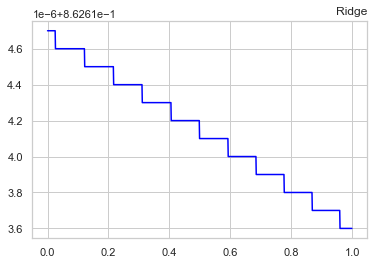

In [11]:
op = []
for i in arr:
    op.append(round((ridge(i)),7))

plt.plot(arr,op,color = 'blue')
plt.title("Ridge",loc = 'right')
plt.show()

In [12]:
def lasso(a):
    from sklearn.linear_model import Lasso
    l_r = Lasso(alpha=a)
    l_r.fit(X_train,y_train)
    return round(l_r.score(X_test,y_test),7)

c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.0981173068045, tolerance: 0.025414771622934918
  positive)


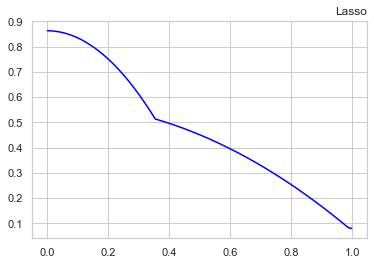

In [13]:
op = []
for i in arr:
    op.append(round((lasso(i)),7))

plt.plot(arr,op,color = 'blue')
plt.title("Lasso",loc = 'right')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train,y_train)

LogisticRegression()

In [15]:
round(log_r.score(X_test,y_test),7)

0.9883382

In [16]:
print("Accuracy in logistic regression is %.2f" %(round(log_r.score(X_test,y_test),4)*100))

Accuracy in logistic regression is 98.83
